In [55]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

dataset = pd.read_csv('Training_set.csv', sep = ";")
dataset.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [56]:
dataset.nunique()

id                       59400
status_group                 3
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_qu

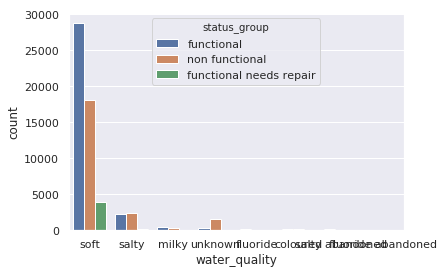

In [57]:
sns.countplot(data= dataset, x='water_quality', hue='status_group')
sns.set(rc={'figure.figsize':(15,10)})

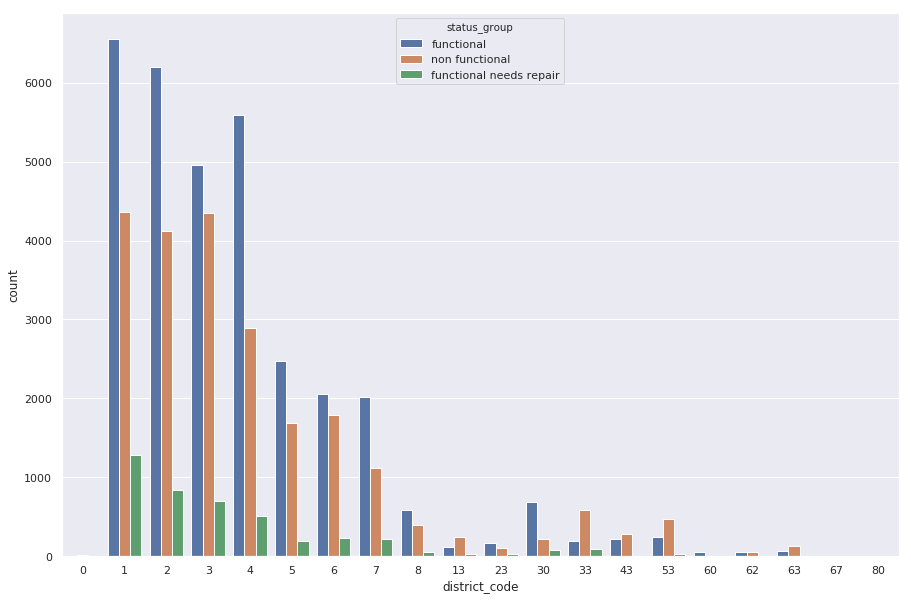

In [58]:
sns.countplot(data= dataset, x='district_code', hue='status_group')

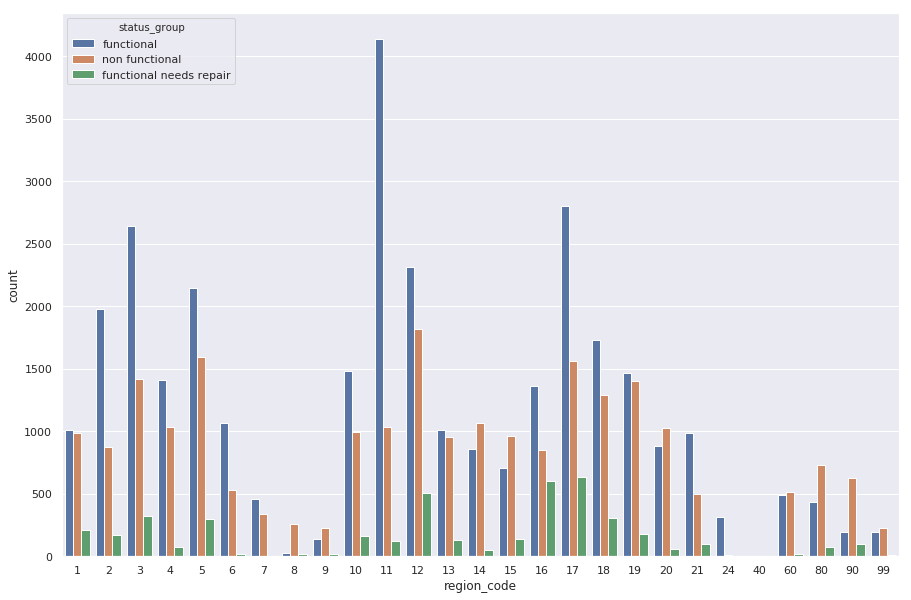

In [59]:
sns.countplot(data= dataset, x='region_code', hue='status_group')

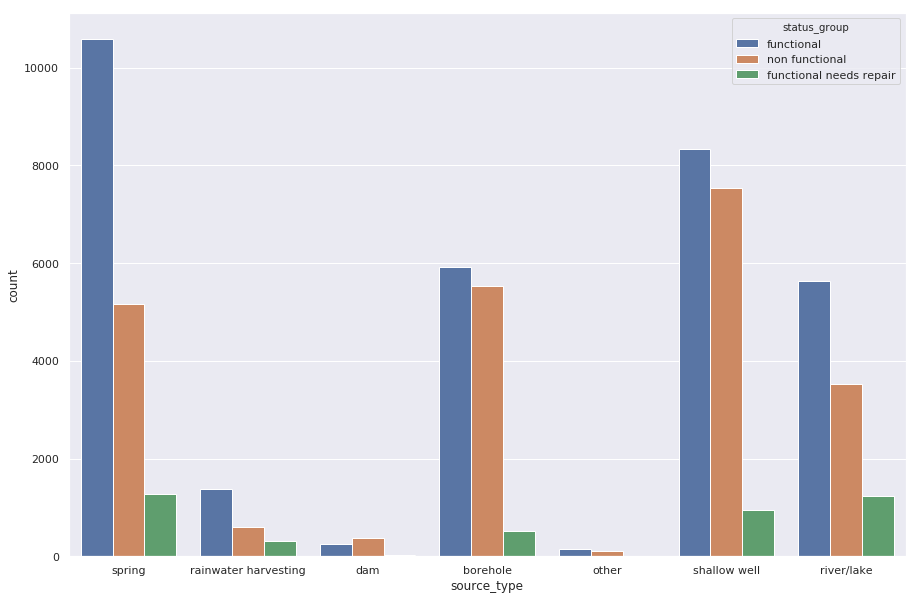

In [60]:
sns.countplot(data= dataset, x='source_type', hue='status_group')

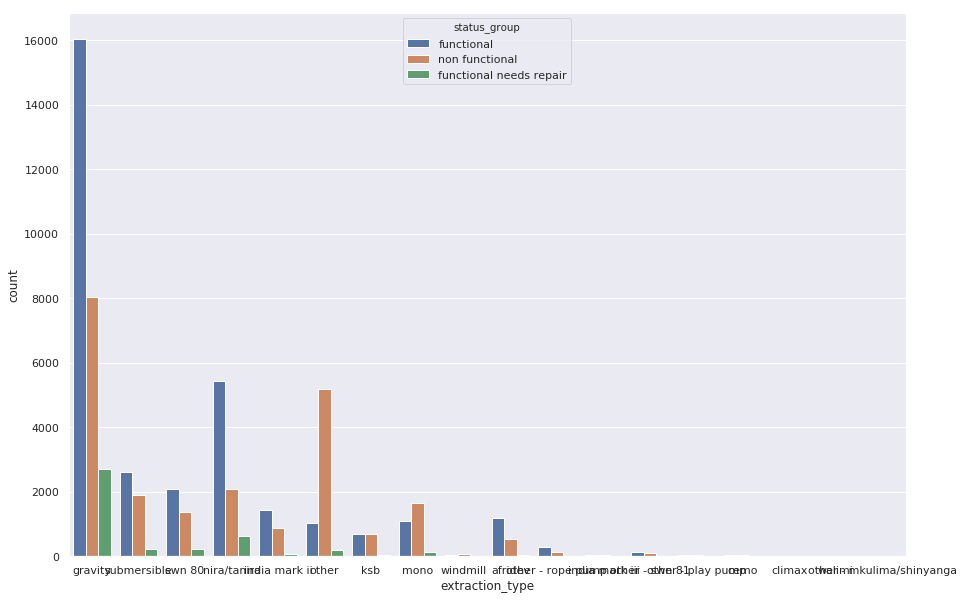

In [61]:
sns.countplot(data= dataset, x='extraction_type', hue='status_group')

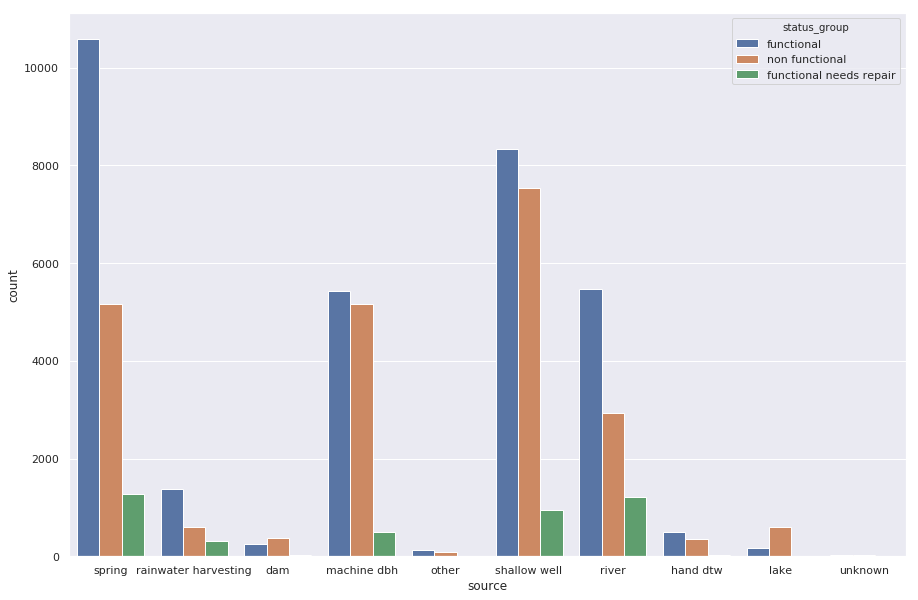

In [62]:
sns.countplot(data= dataset, x='source', hue='status_group')

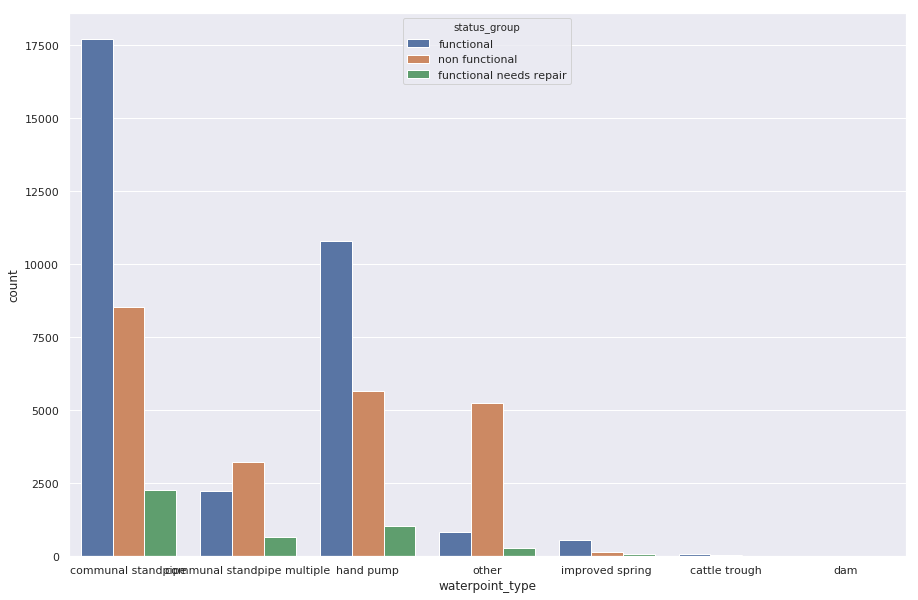

In [63]:
sns.countplot(data= dataset, x='waterpoint_type', hue='status_group')

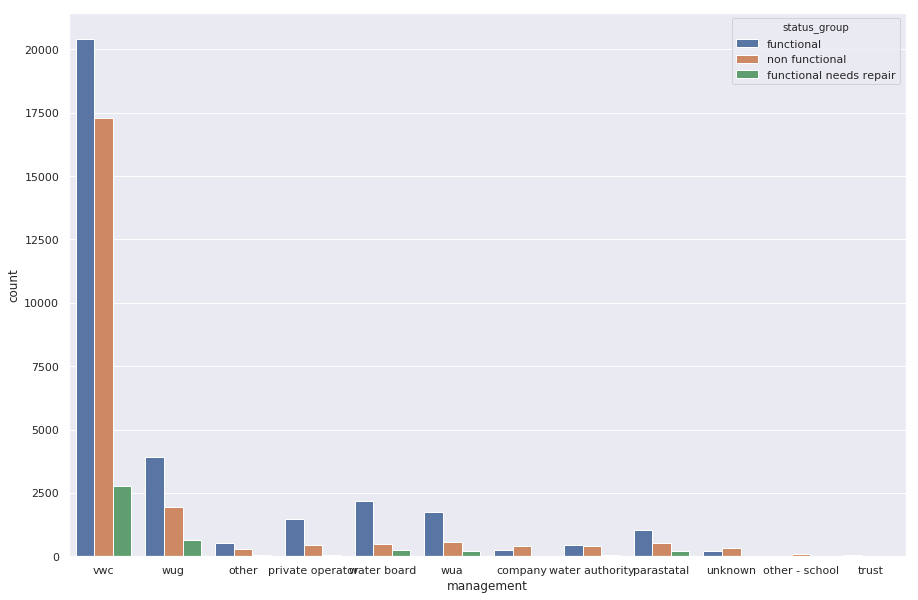

In [64]:
sns.countplot(data= dataset, x='management', hue='status_group')

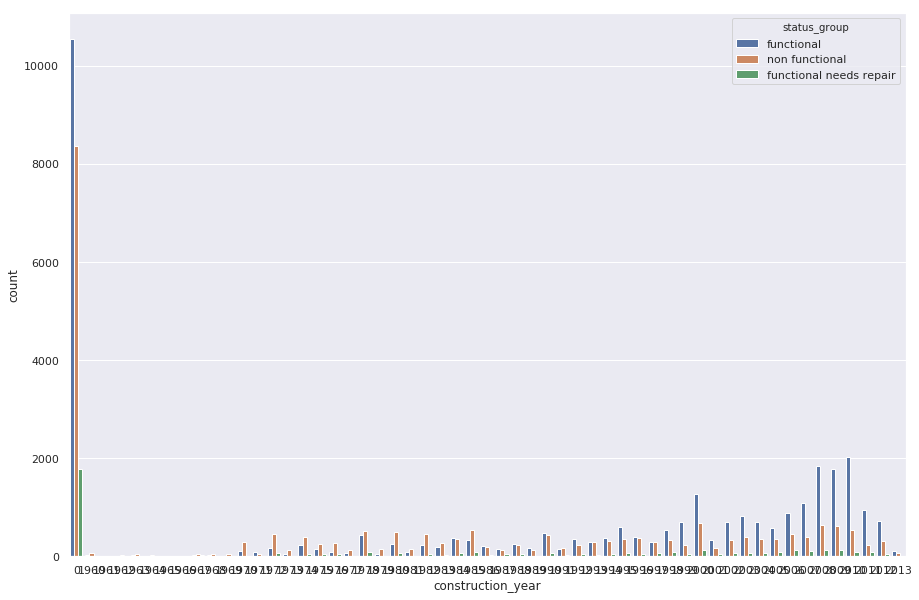

In [65]:
sns.countplot(data= dataset, x='construction_year', hue='status_group')

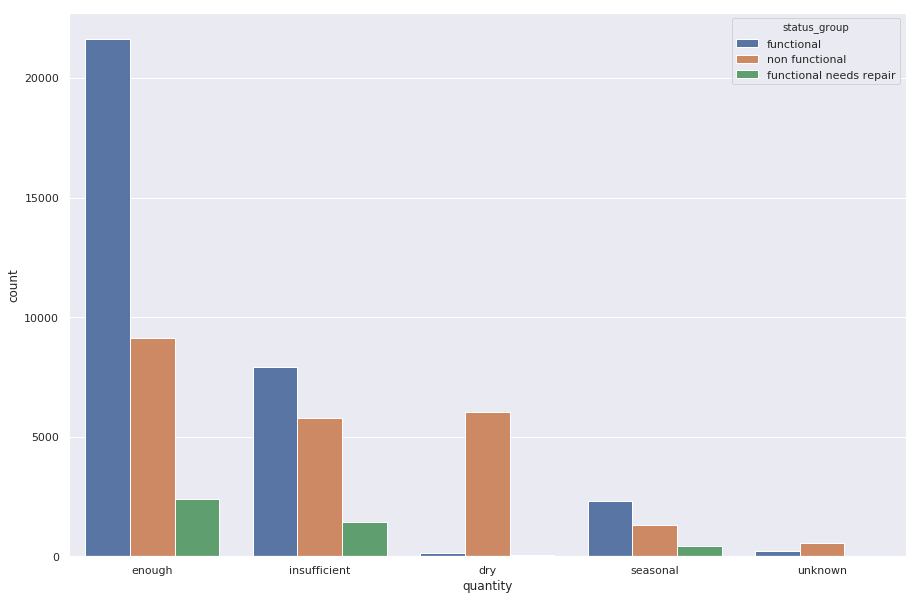

In [66]:
sns.countplot(data= dataset, x='quantity', hue='status_group')

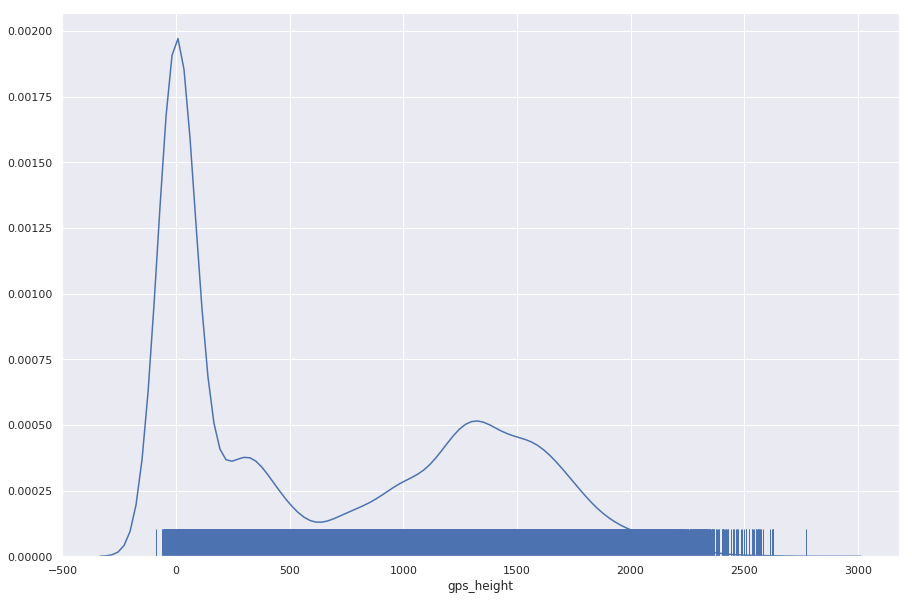

In [67]:
sns.distplot(dataset.gps_height, hist=False, rug=True, bins=50)

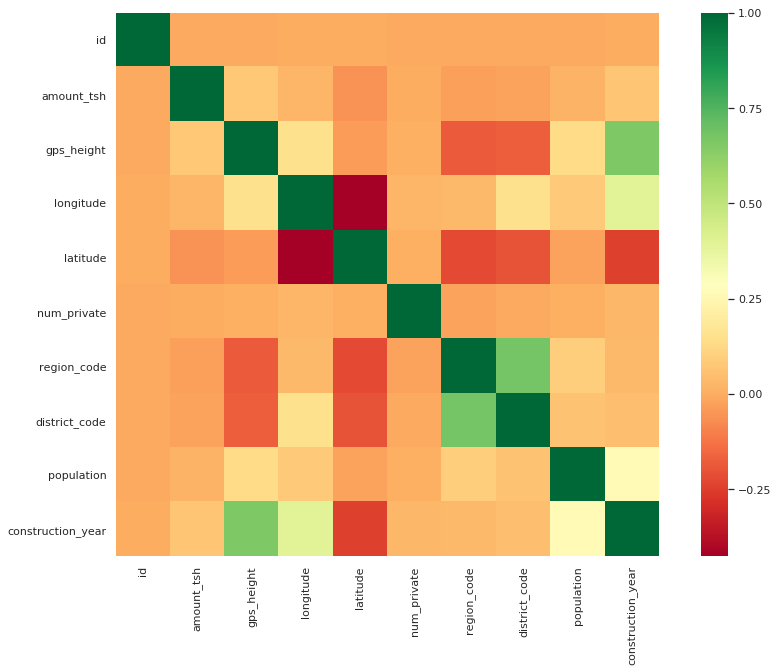

In [68]:
sns.heatmap(dataset.corr(), square=True, cmap='RdYlGn')

In [70]:
def status_group_to_numeric(x):
    if x=='functional':
        return 3
    if x=='functional needs repair':
        return 2
    if x=='non functional':
        return 1

In [71]:
dataset['status_group_num'] = dataset['status_group'].apply(status_group_to_numeric)
dataset.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_num
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,3
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,3
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3


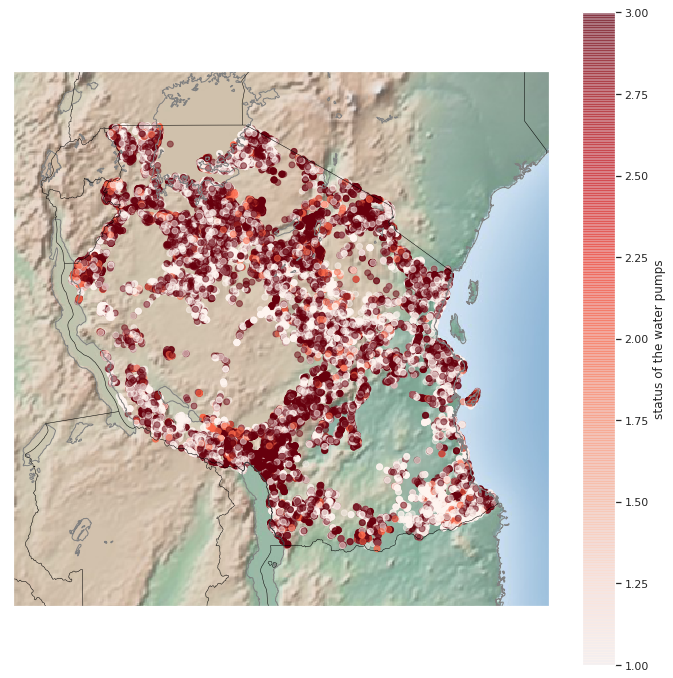

In [76]:
# Extract the data we're interested in
lat = dataset['latitude'].values
lon = dataset['longitude'].values
#population = dataset['population'].values
status = dataset['status_group_num'].values
#area = dataset['region'].values

# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-6.3728, lon_0=34.8925,
            width=1.5E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
#, s=area,
m.scatter(lon, lat, latlon=True,c=status,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label='status of the water pumps')
plt.clim(1, 3)

# make legend with dummy points
#for a in [100, 300, 500]:
#    plt.scatter([], [], c='k', alpha=0.5, s=a,
#                label=str(a) + ' km$^2$')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left');